In [1]:
import numpy as np
import cv2
import pandas as pd
import os
import pickle

# Face Detection Model
- Load the models

In [2]:
face_detection_model = './models/res10_300x300_ssd_iter_140000.caffemodel'
face_detection_proto = './models/deploy.prototxt.txt'
face_descriptor = './models/openface.nn4.small2.v1.t7'
# load models using cv2 dnn
detector_model = cv2.dnn.readNetFromCaffe(face_detection_proto,face_detection_model)
descriptor_model = cv2.dnn.readNetFromTorch(face_descriptor)

In [3]:
!ls images

Angelina Jolie     Donald Trump       Leonardo DiCaprio  Roger Federer
Barack Obama       Elon Musk          Lionel Messi       Scarlett Johansson
Cristiano Ronaldo  Joe Biden          Robert Downey Jr   Tom Curise


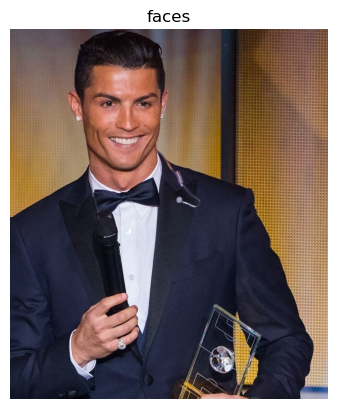

In [4]:
import matplotlib.pyplot as plt

# consider sample image
img = cv2.imread('./images/Cristiano Ronaldo/ronaldo5.jpg')

# Convert from BGR to RGB format
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display using matplotlib
plt.imshow(img_rgb)
plt.axis('off') # to hide the axis values
plt.title('faces')
plt.show()

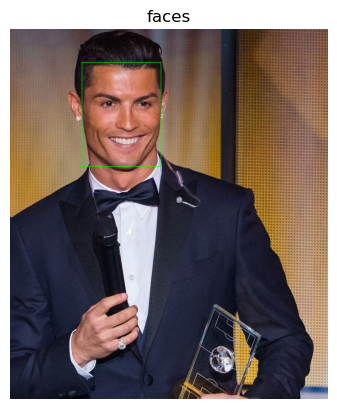

In [11]:
img = cv2.imread('./images/Cristiano Ronaldo/ronaldo5.jpg')
    # step-1: face detection
image = img.copy()
h,w = image.shape[:2]
img_blob = cv2.dnn.blobFromImage(image,1,(300,300),(104,177,123),swapRB=False,crop=False)
# set the input
detector_model.setInput(img_blob)
detections = detector_model.forward()

if len(detections) > 0:
    i = np.argmax(detections[0,0,:,2])# consider the face with max confidence score
    confidence = detections[0,0,i,2]
    if confidence > 0.5:
        box = detections[0,0,i,3:7]*np.array([w,h,w,h])
        (startx,starty,endx,endy) = box.astype('int')
        img_draw = image.copy()
        cv2.rectangle(img_draw,(startx,starty),(endx,endy),(0,255,0))
    
        
img_rgb = cv2.cvtColor(img_draw, cv2.COLOR_BGR2RGB)

# Display using matplotlib
plt.imshow(img_rgb)
plt.axis('off') # to hide the axis values
plt.title('faces')
plt.show()

In [12]:
def helper(image_path):
    img = cv2.imread(image_path)
    # step-1: face detection
    image = img.copy()
    h,w = image.shape[:2]
    img_blob = cv2.dnn.blobFromImage(image,1,(300,300),(104,177,123),swapRB=False,crop=False)
    # set the input
    detector_model.setInput(img_blob)
    detections = detector_model.forward()

    if len(detections) > 0:
        i = np.argmax(detections[0,0,:,2])# consider the face with max confidence score
        confidence = detections[0,0,i,2]
        if confidence > 0.5:
            box = detections[0,0,i,3:7]*np.array([w,h,w,h])
            (startx,starty,endx,endy) = box.astype('int')
            # step-2: Feature Extraction or Embedding
            roi = image[starty:endy,startx:endx].copy()
            # get the face descriptors
            faceblob = cv2.dnn.blobFromImage(roi,1/255,(96,96),(0,0,0),swapRB=True,crop=True)
            descriptor_model.setInput(faceblob)
            vectors = descriptor_model.forward()
            
            return vectors
    return None


# apply helper function to all images and get face descriptors

In [13]:
data = dict(data=[],label=[])

In [17]:
folders = [f for f in os.listdir('images') if os.path.isdir(os.path.join('images', f))]

for folder in folders:
    filenames = os.listdir('images/{}'.format(folder))
    for filename in filenames:
        try:
            vector = helper('./images/{}/{}'.format(folder, filename))
            if vector is not None:
                data['data'].append(vector)
                data['label'].append(folder)
                print('Feature Extracted Successfully')
        except:
            pass


Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature 

Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature 

Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature 

Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature 

Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature 

Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully


In [18]:
data.keys()

dict_keys(['data', 'label'])

In [19]:
pd.Series(data['label']).value_counts()

Robert Downey Jr      250
Lionel Messi          228
Roger Federer         222
Barack Obama          122
Donald Trump          122
Scarlett Johansson    119
Elon Musk             117
Cristiano Ronaldo     109
Leonardo DiCaprio     106
Angelina Jolie         98
Joe Biden              98
Tom Curise             96
Name: count, dtype: int64

In [20]:
# save the data
pickle.dump(data,open('data_face_features.pickle',mode='wb'))